In [6]:
%pip install -q mysqlclient sqlalchemy
import sqlalchemy as sa

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import pandas
import pandas as pd

In [8]:
HOST_AND_PORT = "20.218.241.192:3306"
DB_NAME = "sakila"
USERNAME = "dapLearner"
PASSWORD = "$qlQu3ry&B!gData"

In [9]:
# Create the DB engine connector
db_cnx = sa.create_engine(f"mysql://{USERNAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}")

In [13]:
# Read the Customer Table
db_query = """
        SELECT *
        FROM customer
        """
cust_df = pd.read_sql(db_query, db_cnx)


In [17]:
%pip install sqlalchemy mysql-python mysqlclient pymysql mysql-connector-python python-dotenv

  Using cached MySQL-python-1.2.5.zip (108 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mysql_connector_python-8.3.0-cp310-cp310-win_amd64.whl.metadata (2.0 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
Using cached mysql_connector_python-8.3.0-cp310-cp310-win_amd64.whl (15.4 MB)
Failed to build mysql-python
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for mysql-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      C:\Users\user\AppData\Local\Temp\pip-build-env-jko9eoss\overlay\Lib\site-packages\setuptools\dist.py:472: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'distribution-name' will not be supported in future
              versions. Please use the underscore name 'distribution_name' instead.
      
              By 2024-Sep-26, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
   

In [19]:
# # Import key libraries and packages
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sa
# from dotenv import load_dotenv

In [20]:
cust_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [21]:
(
    cust_df
    .describe()
)

,customer_id,store_id,address_id,active,create_date,last_update
count,599.000000,599.000000,599.000000,599.000000,599,599
mean,300.000000,1.455760,304.724541,0.974958,2006-02-14 22:04:36.547579008,2006-02-15 04:57:20.000000256
min,1.000000,1.000000,5.000000,0.000000,2006-02-14 22:04:36,2006-02-15 04:57:20
25%,150.500000,1.000000,154.500000,1.000000,2006-02-14 22:04:36,2006-02-15 04:57:20
50%,300.000000,1.000000,305.000000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20
75%,449.500000,2.000000,454.500000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20
max,599.000000,2.000000,605.000000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20
std,173.060683,0.498455,173.698609,0.156382,NaN,NaN


In [10]:
# Select the title, rating and rental duration from the film table
film_query = """SELECT title, rating, rental_duration
                FROM film
            """

film_df = pd.read_sql(film_query, db_cnx)
film_df.head()

,title,rating,rental_duration
0,ACADEMY DINOSAUR,PG,6
1,ACE GOLDFINGER,G,3
2,ADAPTATION HOLES,NC-17,7
3,AFFAIR PREJUDICE,G,5
4,AFRICAN EGG,G,6


In [11]:
# Filter the above result in SQL for where `rating = "G" AND rental_duration >= 7`
filtered_film_query = """SELECT title, rating, rental_duration
                        FROM film
                        WHERE rating = "G" AND rental_duration >=7
                    """

filtered_film_df = pd.read_sql(filtered_film_query, db_cnx)
filtered_film_df.head()

,title,rating,rental_duration
0,BLANKET BEVERLY,G,7
1,BORROWERS BEDAZZLED,G,7
2,BRIDE INTRIGUE,G,7
3,CATCH AMISTAD,G,7
4,CITIZEN SHREK,G,7


In [15]:
# Filter the above result in SQL for where `rating = "G" AND rental_duration >= 7`
film_query = """SELECT *
                FROM sakila.customer as ca
                    INNER JOIN sakila.payment as py
                    ON ca.customer_id = py.customer_id
                        
                    """

cust_pay_df = pd.read_sql(film_query, db_cnx)
cust_pay_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [16]:
(
    cust_pay_df
    .info()
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   16044 non-null  int64         
 1   store_id      16044 non-null  int64         
 2   first_name    16044 non-null  object        
 3   last_name     16044 non-null  object        
 4   email         16044 non-null  object        
 5   address_id    16044 non-null  int64         
 6   active        16044 non-null  int64         
 7   create_date   16044 non-null  datetime64[ns]
 8   last_update   16044 non-null  datetime64[ns]
 9   payment_id    16044 non-null  int64         
 10  customer_id   16044 non-null  int64         
 11  staff_id      16044 non-null  int64         
 12  rental_id     16044 non-null  int64         
 13  amount        16044 non-null  float64       
 14  payment_date  16044 non-null  datetime64[ns]
 15  last_update   16044 non-null  dateti

<Axes: ylabel='email'>

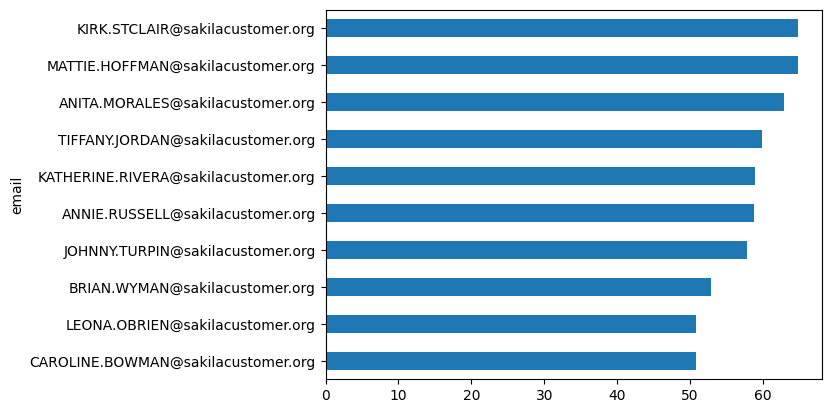

In [24]:
import matplotlib.pyplot as plt


(
 cust_pay_df
#  groupby email
.groupby('email') 
# Aggregate by sum of the amount  
['amount'].sum()
# order by ascending
.sort_values(ascending=True)
# select the top 10
.head(10)
# let plot
.plot.barh()

)

Working with Time Series data

In [25]:
cust_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   16044 non-null  int64         
 1   store_id      16044 non-null  int64         
 2   first_name    16044 non-null  object        
 3   last_name     16044 non-null  object        
 4   email         16044 non-null  object        
 5   address_id    16044 non-null  int64         
 6   active        16044 non-null  int64         
 7   create_date   16044 non-null  datetime64[ns]
 8   last_update   16044 non-null  datetime64[ns]
 9   payment_id    16044 non-null  int64         
 10  customer_id   16044 non-null  int64         
 11  staff_id      16044 non-null  int64         
 12  rental_id     16044 non-null  int64         
 13  amount        16044 non-null  float64       
 14  payment_date  16044 non-null  datetime64[ns]
 15  last_update   16044 non-null  dateti

In [26]:
cust_pay_df.describe()

,customer_id,store_id,address_id,active,create_date,last_update,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
count,16044.000000,16044.000000,16044.000000,16044.000000,16044,16044,16044.000000,16044.000000,16044.000000,16044.000000,16044.000000,16044,16044
mean,297.143169,1.454812,301.858514,0.974819,2006-02-14 22:04:36.542258560,2006-02-15 04:57:20,8024.483732,297.143169,1.498005,8025.371478,4.201356,2005-07-23 08:12:53.217526912,2006-02-15 22:16:22.966404864
min,1.000000,1.000000,5.000000,0.000000,2006-02-14 22:04:36,2006-02-15 04:57:20,1.000000,1.000000,1.000000,1.000000,0.000000,2005-05-24 22:53:30,2006-02-15 22:12:30
25%,148.000000,1.000000,152.000000,1.000000,2006-02-14 22:04:36,2006-02-15 04:57:20,4012.750000,148.000000,1.000000,4013.750000,2.990000,2005-07-07 00:58:40.500000,2006-02-15 22:13:28
50%,296.000000,1.000000,301.000000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20,8024.500000,296.000000,1.000000,8025.500000,3.990000,2005-07-28 16:04:32.500000,2006-02-15 22:15:37
75%,446.000000,2.000000,451.000000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20,12036.250000,446.000000,2.000000,12037.250000,4.990000,2005-08-17 21:16:23,2006-02-15 22:18:57
max,599.000000,2.000000,605.000000,1.000000,2006-02-14 22:04:37,2006-02-15 04:57:20,16049.000000,599.000000,2.000000,16049.000000,11.990000,2006-02-14 15:16:03,2006-02-15 22:24:13
std,172.453136,0.497969,173.085371,0.156679,NaN,NaN,4632.695501,172.453136,0.500012,4632.777249,2.362961,NaN,NaN


<Axes: xlabel='payment_date'>

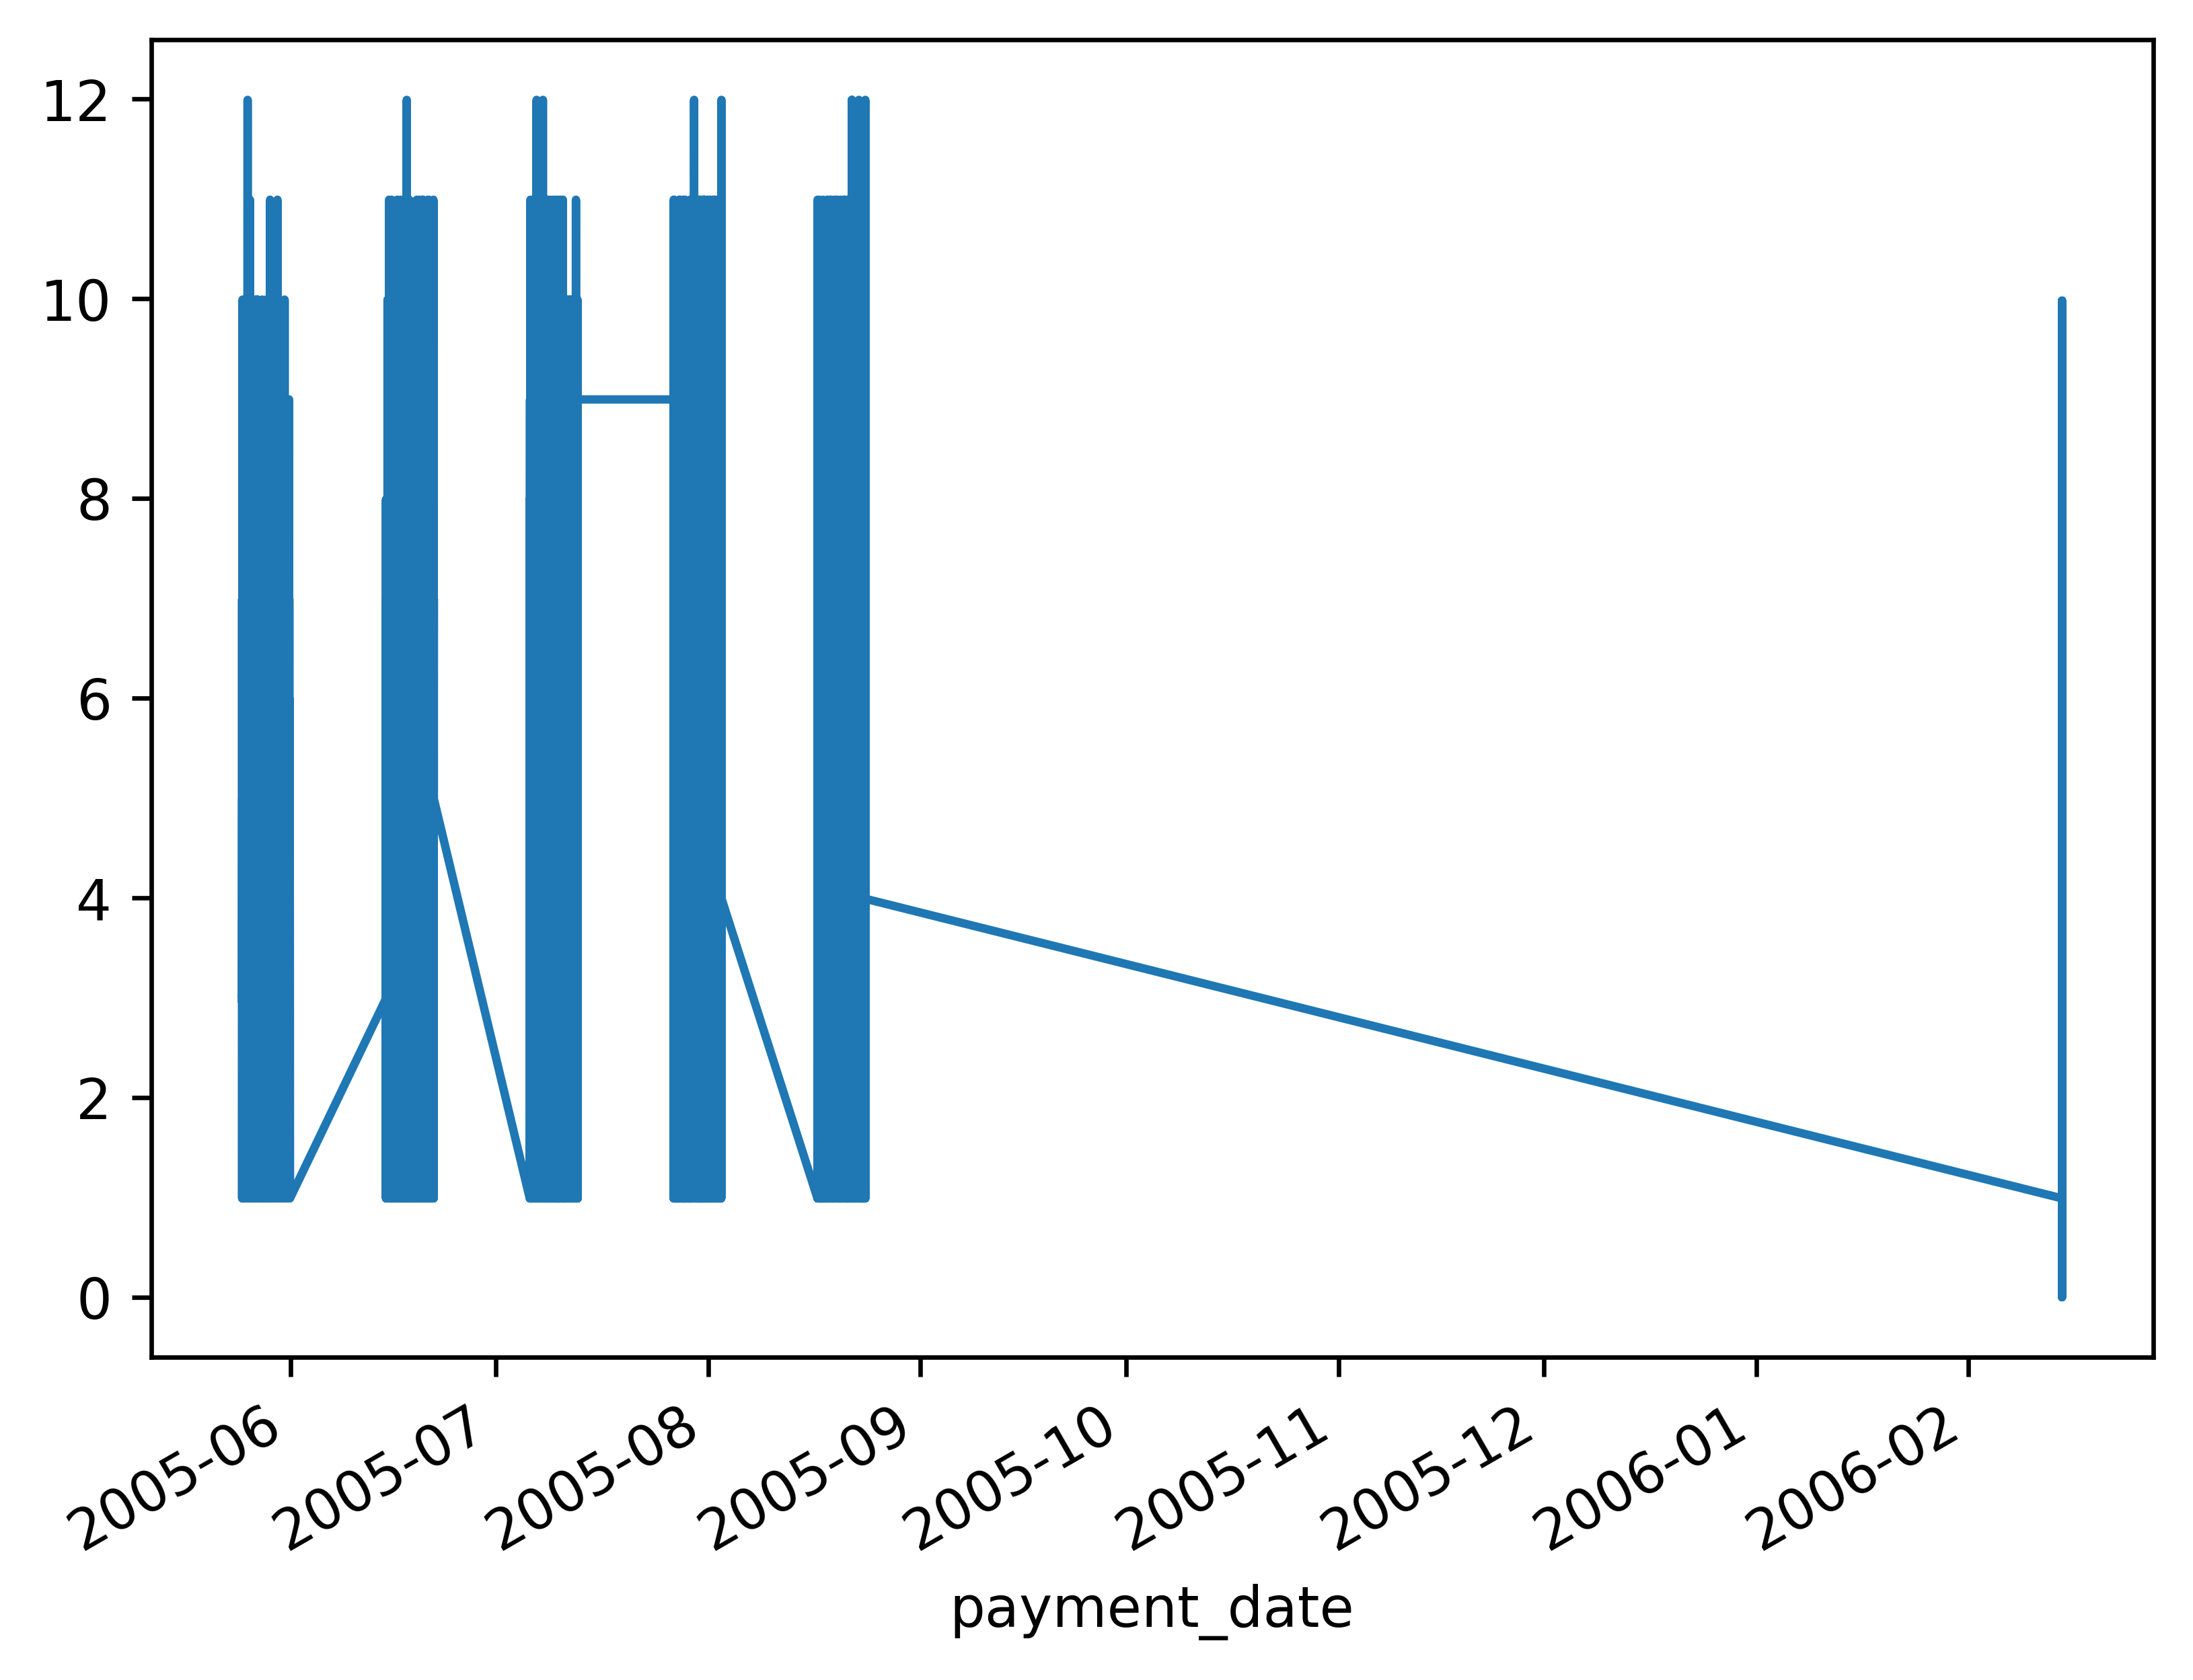

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=600)

# lets plot the payment series
(
    cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # select the payment date col
    ['amount']
    .plot()
    
    
    
    
)


Slicing Time series 
when working with time series data always set the datetime as index of the dataframe

<Axes: xlabel='payment_date'>

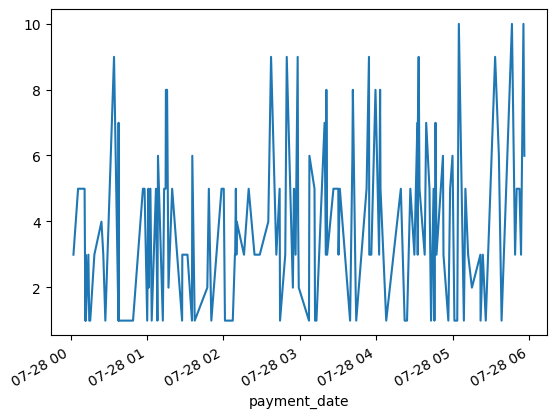

In [47]:
# lets plot the payment series
(
    cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # Sort index in ascending order
    .sort_index(ascending=True)
    # lets slice our time series to view Payments on July 28
    .loc['2005/7/28 00:00':'2005/7/28 6:00']
    # select the payment date col
    ['amount']
    .plot()
)

<Axes: xlabel='payment_date'>

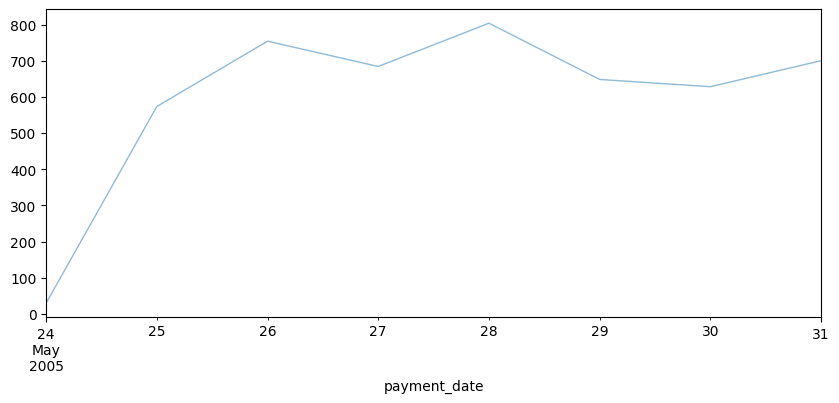

In [57]:
(
    cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # Sort index in ascending order
    .sort_index(ascending=True)
     # select the payment date col
    ['amount']
    # Resample to Daily
    .resample('D')
    # Aggregate by suming payments each day
    .sum()
    # Now select the month of May
    .loc['2005/5']
    # Plot the records
    .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily Totals in May')
)

<Axes: xlabel='payment_date'>

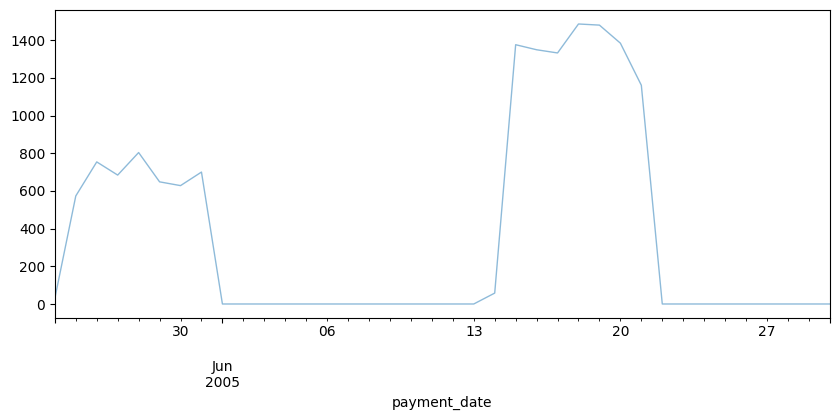

In [58]:
(
    cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # Sort index in ascending order
    .sort_index(ascending=True)
     # select the payment date col
    ['amount']
    # Resample to Daily
    .resample('D')
    # Aggregate by suming payments each day
    .sum()
    # Now select the month of May
    .loc['2005/5':'2005/06']
    # Plot the records
    .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily Totals in May')
)

<Axes: xlabel='payment_date'>

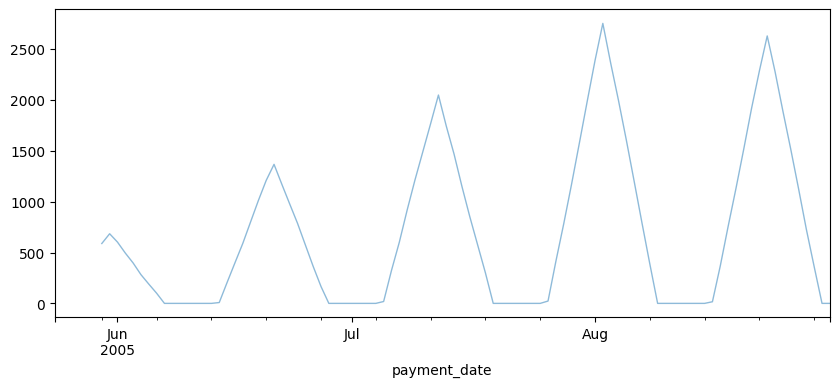

In [68]:
(
    cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # Sort index in ascending order
    .sort_index(ascending=True)
     # select the payment date col
    ['amount']
    # Resample to Daily
    .resample('D')
    # Aggregate by suming payments each day
    .sum()
    # 7 day Rolling Sum
    .rolling(7)
    # find the average over the 7 days
    .mean()
    # Now select the month of Aud
    .loc['2005/5':'2005/8']
    # Plot the records
    .plot(figsize=(10,4), alpha=.5, linewidth=1, label='Daily Totals in May')
)

<Axes: ylabel='payment_date'>

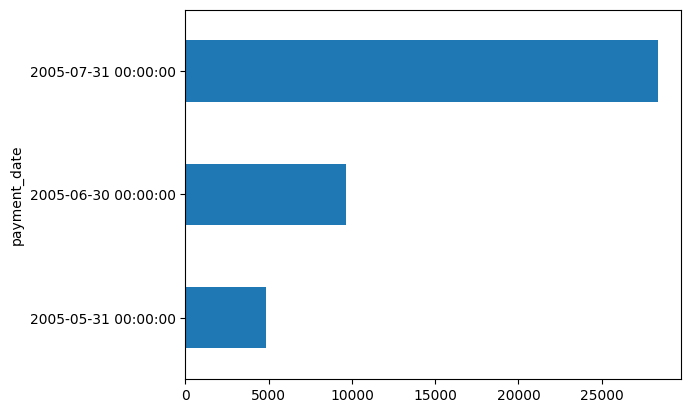

In [71]:
(cust_pay_df
    # importance to set the date time as index
    .set_index('payment_date')
    # Sort index in ascending order
    .sort_index(ascending=True)
     # select the payment date col
    ['amount']
    # Resample to Daily
    .resample('M')
    # Aggregate by suming payments each day
    .sum()
    # 7 day Rolling Sum
    # .rolling(7)
    # find the average over the 7 days
    # .mean()
    # Now select the month of Aug
    .loc['2005/5':'2005/7']
    # Plot the records
    .plot.barh()
)

Working with Application Programming Interfaces(APIs)

In [73]:
# !pip install requests
import requests